# 11 scikit-learn - Machine Learning in Python

Home : http://scikit-learn.org/stable/

 * 데이터 마이닝 및 데이터 분석을위한 간단하고 효율적인 도구
 * 모두에게 접근 가능하고 다양한 상황에서 재사용 가능
 * NumPy, SciPy 및 matplotlib을 기반으로 제작
 * 상업적으로 사용 가능한 오픈 소스 - BSD 라이센스


주요 카타고리

 * Classification
 * Regression
 * Clustering
 * Dimensionality reduction
 * Model selection
 * Preprocessing
 
test some examples

## 11.1 A demo of the mean-shift clustering algorithm


In [1]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

Generate sample data

In [2]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

In [3]:
X.shape

(10000, 2)

In [4]:
X

array([[ 0.63205875, -1.10033041],
       [ 1.1646367 ,  0.54949967],
       [ 1.09801164, -0.48433801],
       ..., 
       [ 0.7911856 ,  1.38891101],
       [ 1.5396057 , -1.82623267],
       [ 1.00225342, -0.86526638]])

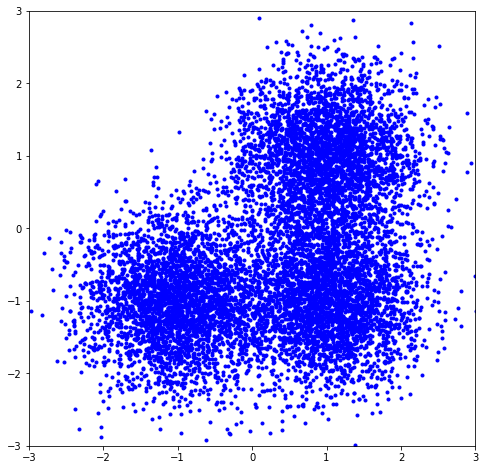

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.plot(X[:, 0], X[:, 1], 'b.')
plt.xlim((-3, 3))
plt.ylim((-3, 3))
plt.show()

In [6]:
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


In [7]:
labels

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [8]:
cluster_centers

array([[ 0.96252514, -0.90933548],
       [ 0.99250436,  0.88572   ],
       [-0.94119985, -1.01476956]])

In [9]:
labels_unique

array([0, 1, 2], dtype=int64)

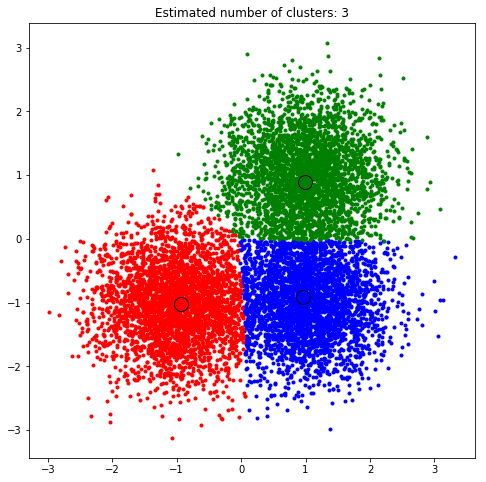

In [10]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1, figsize=(8, 8))
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## 11.2 Decision Trees

붓꽃 의사결정트리 구성하기

In [11]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()

In [12]:
iris.data[:10]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [13]:
iris.target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
np.unique(iris.target)

array([0, 1, 2])

In [15]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

학습이 되었으면 export_graphviz() 함수를 이용하여 Graphiz 포맷으로 결과를 출력한다.

In [16]:
from sklearn.externals.six import StringIO
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

Graphviz2.38 설치

http://www.graphviz.org/Download_windows.php

In [17]:
!"c:\Program Files (x86)\Graphviz2.38\bin\dot" -Tpdf iris.dot -o iris.pdf

iris.pdf 확인

In [18]:
clf.predict(iris.data[:10, :])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
clf.predict_proba(iris.data[:10, :])

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])